In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=True,
)

Found 69768 files belonging to 38 classes.


In [3]:
df_valid = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=True,
)

Found 17452 files belonging to 38 classes.


In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [6]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Dropout(0.25))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=2000,activation='relu'))

In [13]:
model.add(Dropout(0.4))

In [14]:
model.add(Dense(units = 38, activation='softmax'))

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2000)                │       4,098,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          76,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,886,262 (33.90 MB)

 Trainable params: 8,886,262 (33.90 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_hist = model.fit(x=df_train,validation_data=df_valid,epochs=5)

Epoch 1/5
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 1948s 889ms/step - accuracy: 0.4221 - loss: 2.0219 - val_accuracy: 0.8399 - val_loss: 0.5270
Epoch 2/5
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 1720s 788ms/step - accuracy: 0.8344 - loss: 0.5217 - val_accuracy: 0.9014 - val_loss: 0.3128
Epoch 3/5
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 1735s 795ms/step - accuracy: 0.9043 - loss: 0.2925 - val_accuracy: 0.9253 - val_loss: 0.2333
Epoch 4/5
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 1716s 787ms/step - accuracy: 0.9342 - loss: 0.1998 - val_accuracy: 0.9283 - val_loss: 0.2268
Epoch 5/5
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 1812s 831ms/step - accuracy: 0.9506 - loss: 0.1484 - val_accuracy: 0.9436 - val_loss: 0.1733


evalution

In [18]:
train_loss, train_accuracy = model.evaluate(df_train)

2181/2181 ━━━━━━━━━━━━━━━━━━━━ 394s 181ms/step - accuracy: 0.9689 - loss: 0.0936


In [19]:
print("training_loss:",train_loss)

training_loss: 0.08464037626981735


In [20]:
val_loss,val_acc = model.evaluate(df_valid)

546/546 ━━━━━━━━━━━━━━━━━━━━ 93s 170ms/step - accuracy: 0.9427 - loss: 0.1764


In [21]:
print("validation:",val_loss)

validation: 0.17334075272083282


In [22]:
model.save("trained_model.keras")

In [23]:
train_hist.history

{'accuracy': [0.6174033880233765,
  0.85845947265625,
  0.9154913425445557,
  0.9409041404724121,
  0.9564986824989319],
 'loss': [1.2803746461868286,
  0.439273864030838,
  0.25865307450294495,
  0.17899763584136963,
  0.1307966262102127],
 'val_accuracy': [0.839903712272644,
  0.9014439582824707,
  0.925280749797821,
  0.928317666053772,
  0.9436167478561401],
 'val_loss': [0.5269742012023926,
  0.31284603476524353,
  0.23331646621227264,
  0.22682936489582062,
  0.17334066331386566]}

In [24]:
#Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(train_hist.history,f)

In [25]:
#accuracy visualization

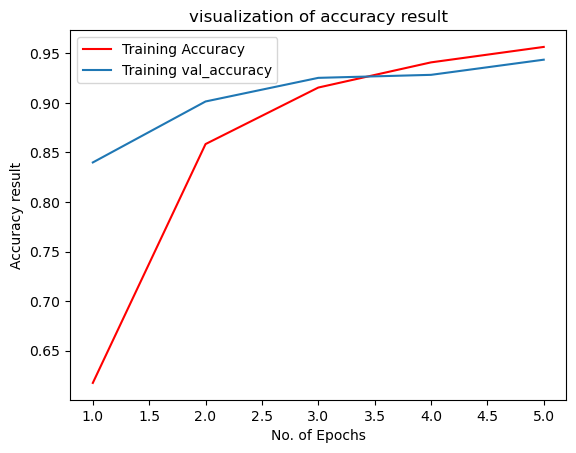

In [26]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,train_hist.history["accuracy"],color = "red",label = "Training Accuracy")
plt.plot(epochs,train_hist.history["val_accuracy"],label = "Training val_accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy result")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()

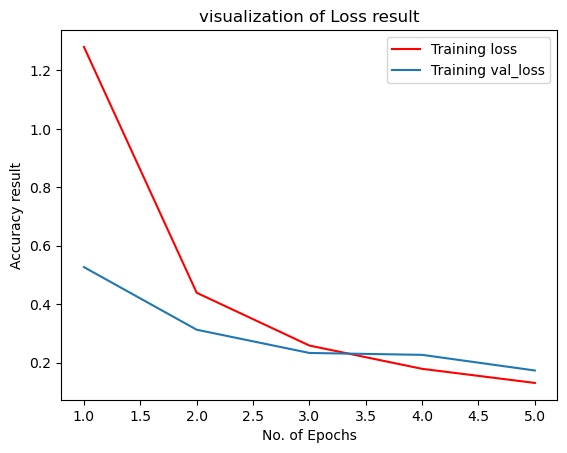

In [40]:
epochs1 = [i for i in range(1,6)]
plt.plot(epochs,train_hist.history["loss"],color = "red",label = "Training loss")
plt.plot(epochs,train_hist.history["val_loss"],label = "Training val_loss")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy result")
plt.title("visualization of Loss result")
plt.legend()
plt.show()

In [28]:
class_name = df_valid.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
test_df = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=True,
)

Found 17452 files belonging to 38 classes.


In [30]:
y_pred = model.predict(test_df)
y_pred

546/546 ━━━━━━━━━━━━━━━━━━━━ 93s 168ms/step


array([[9.9315697e-01, 1.6451147e-03, 8.5298765e-05, ..., 3.0048350e-09,
        2.7868265e-09, 2.0375921e-08],
       [9.9978298e-01, 6.1737155e-05, 7.5652511e-06, ..., 1.4620013e-09,
        2.3213390e-08, 1.8891106e-09],
       [9.9998820e-01, 1.9614790e-06, 8.9938339e-06, ..., 2.4964713e-12,
        7.3237395e-11, 5.8171207e-10],
       ...,
       [1.7441233e-14, 3.7415052e-16, 1.6658319e-11, ..., 5.7008100e-15,
        1.5104671e-14, 1.0000000e+00],
       [8.2563418e-14, 1.8444940e-16, 8.8548474e-12, ..., 4.1491718e-15,
        3.6885346e-15, 1.0000000e+00],
       [4.2780222e-16, 8.1393993e-18, 1.5395696e-16, ..., 1.0593089e-16,
        5.1826736e-15, 1.0000000e+00]], dtype=float32)

In [31]:
y_pred.shape

(17452, 38)

In [32]:
PREDICTED_CATEGORIES = tf.argmax(y_pred,axis=1)

In [33]:
PREDICTED_CATEGORIES

<tf.Tensor: shape=(17452,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
true_categories = tf.concat([y for x,y in test_df],axis=0)
true_categories

<tf.Tensor: shape=(17452, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17452,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
print(classification_report(y_true,PREDICTED_CATEGORIES,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.87      0.93       504
                                 Apple___Black_rot       0.99      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.88      0.95      0.91       502
                               Blueberry___healthy       0.94      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.97      0.97       421
                 Cherry_(including_sour)___healthy       0.90      1.00      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.79      0.95      0.86       290
                       Corn_(maize)___Common_rust_       0.97      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.85      0.

In [38]:
cm = confusion_matrix(y_true,PREDICTED_CATEGORIES)
cm

array([[439,   0,   1, ...,   0,   0,   0],
       [  2, 471,   1, ...,   0,   0,   0],
       [  0,   0, 419, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 480,   0,   0],
       [  0,   0,   0, ...,   0, 385,   0],
       [  0,   0,   0, ...,   0,   0, 479]], dtype=int64)

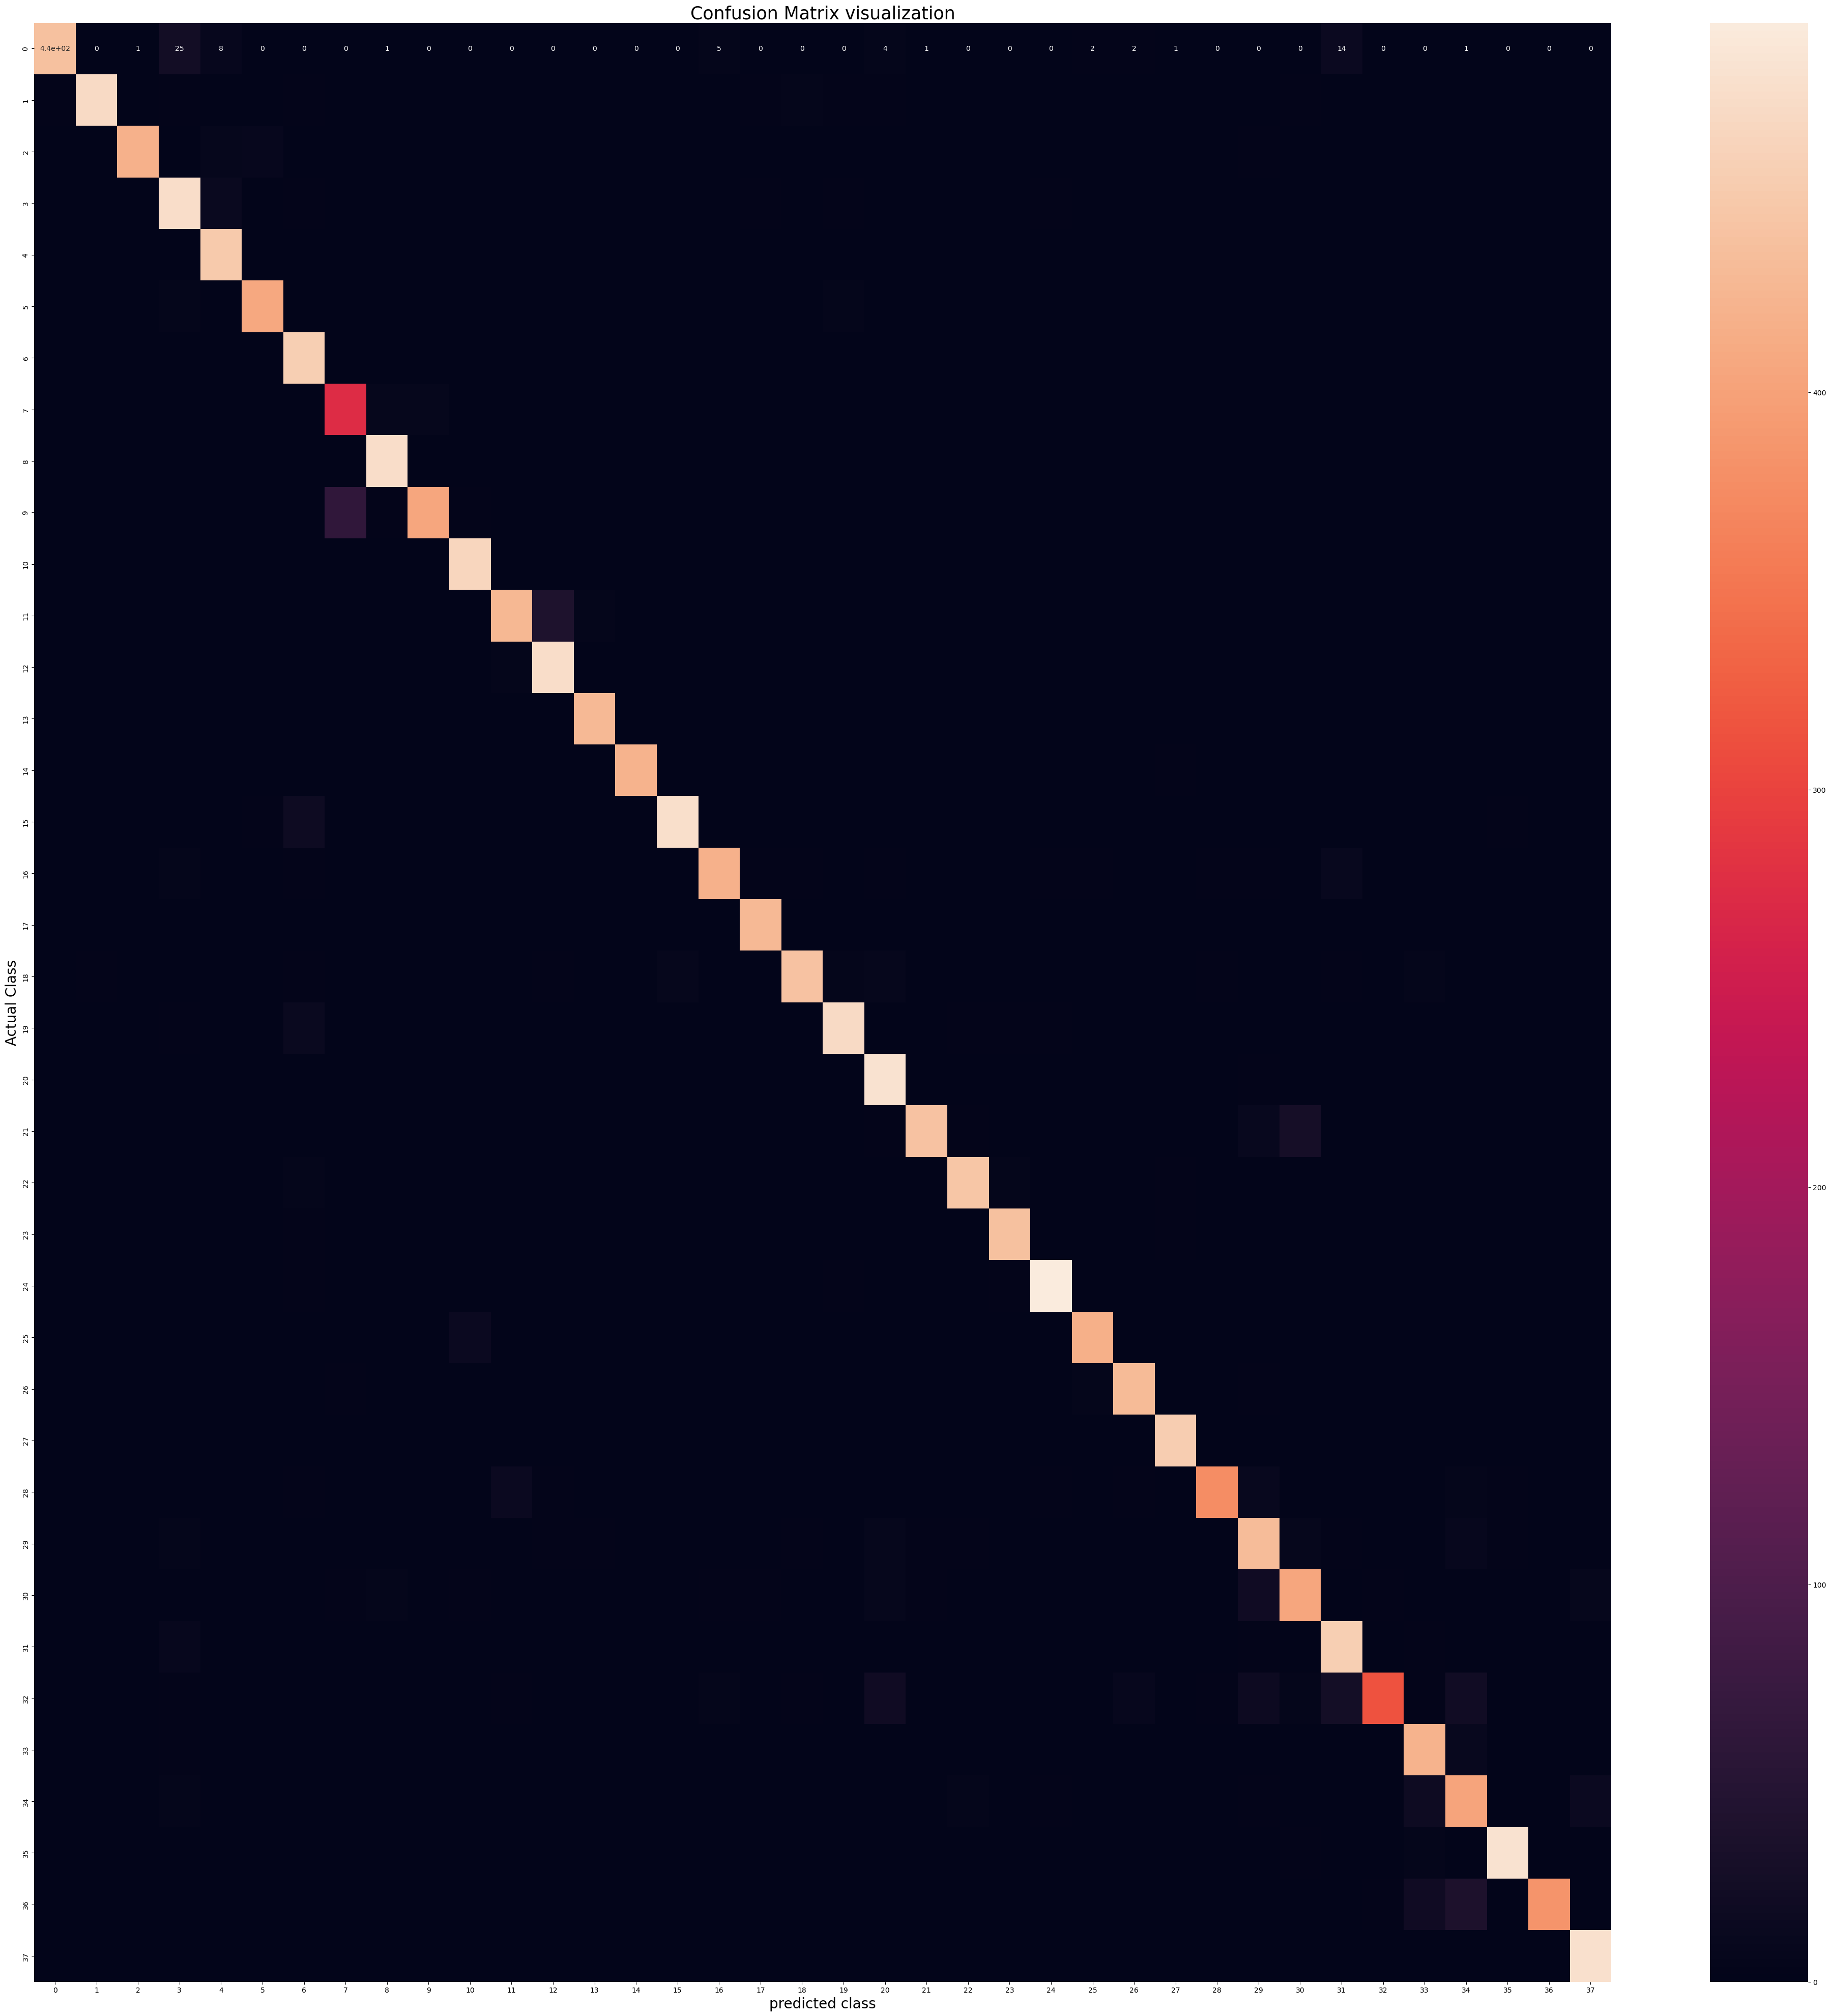

In [39]:
plt.figure(figsize=(50,50))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Confusion Matrix visualization",fontsize=25)
plt.show()